# Script for metrics calculation

# Procedure
1. import dataset and process data set if you need, for example add headers.
2. convert all generated structures and input data  to scaffolds.
3. calculate metrics:
    1. Dividing the dataset into two, the first containing only active scaffolds and the second containing inactive scaffolds
    2. Calculation of metrics separately for each data set
4. vizualization: two function (with percent, without percent)
5. calculate TPRA and TPRAR

# Import libraries

In [2]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles
from rdkit.Chem.Scaffolds.MurckoScaffold import MakeScaffoldGeneric
import seaborn as sns
import matplotlib.pyplot as plt

# Import dataset

The import data sets are without header and first function are add name of columns.

In [3]:
def add_column_name(df):
    df.columns=['id_pair','iterace','start_id','stop_id','start_smiles','stop_smiles','morph_smiles','tanimot','delka','time']
    df = df.drop(df[df.morph_smiles==''].index)
    return df

### All input data are in data/output_Molpher/output_data_after_Molpher.zip

In [8]:
ls

data/  metrics.ipynb  Molpher/  plots/  README.md


In [14]:
df_default = add_column_name(pd.read_csv("data/output_Molpher/output_data_after_Molpher/result_default.csv", header=None))
df_accept_6_12 = add_column_name(pd.read_csv("data/output_Molpher/output_data_after_Molpher/result_accept_6_12.csv", header=None))
df_accept_400_800 = add_column_name(pd.read_csv("data/output_Molpher/output_data_after_Molpher/result_accept_400_800.csv", header=None))
df_accept_400_800 = df_accept_400_800.drop([62018])
df_non_prod_9 = add_column_name(pd.read_csv("data/output_Molpher/output_data_after_Molpher/result_non_prod_9.csv", on_bad_lines='skip',header=None))
df_non_prod_3 = add_column_name(pd.read_csv("data/output_Molpher/output_data_after_Molpher/result_non_prod_3.csv", on_bad_lines='skip',header=None))
df_max_1000 = add_column_name(pd.read_csv("data/output_Molpher/output_data_after_Molpher/result_max_morphs_1000.csv", header=None))
df_max_2000 = add_column_name(pd.read_csv("data/output_Molpher/output_data_after_Molpher/result_max_morph_2000.csv", header=None))

In [15]:
df_default

,id_pair,iterace,start_id,stop_id,start_smiles,stop_smiles,morph_smiles,tanimot,delka,time
0,1502,0,CHEMBL1389315,CHEMBL1356393,O=S(=O)(Nc1c(c2nc3ccccc3nc2n1C4CCCCC4)S(=O)(=O...,COC1=C(OC)C(=O)C(=CC1=O)C(C=C)c2ccccc2,O=S(=O)(NC1=C(S(=O)(=O)C2=CC=CC=C2)C2=NC3=CC=C...,0.368481,51,740.936048
1,1502,0,CHEMBL1389315,CHEMBL1356393,O=S(=O)(Nc1c(c2nc3ccccc3nc2n1C4CCCCC4)S(=O)(=O...,COC1=C(OC)C(=O)C(=CC1=O)C(C=C)c2ccccc2,O=S(=O)(NC1=C(S(=O)(=O)C2C=CC=C2)C2=NC3=CC=CC=...,0.368481,51,740.936048
2,1502,0,CHEMBL1389315,CHEMBL1356393,O=S(=O)(Nc1c(c2nc3ccccc3nc2n1C4CCCCC4)S(=O)(=O...,COC1=C(OC)C(=O)C(=CC1=O)C(C=C)c2ccccc2,C=CC1(S(=O)(=O)C2=C(NS(=O)(=O)C3=CC=CC=C3)N(C3...,0.368481,51,740.936048
3,1502,0,CHEMBL1389315,CHEMBL1356393,O=S(=O)(Nc1c(c2nc3ccccc3nc2n1C4CCCCC4)S(=O)(=O...,COC1=C(OC)C(=O)C(=CC1=O)C(C=C)c2ccccc2,C=CC(C)S(=O)(=O)C1=C(NS(=O)(=O)C2=CC=CC=C2)N(C...,0.368481,51,740.936048
4,1502,0,CHEMBL1389315,CHEMBL1356393,O=S(=O)(Nc1c(c2nc3ccccc3nc2n1C4CCCCC4)S(=O)(=O...,COC1=C(OC)C(=O)C(=CC1=O)C(C=C)c2ccccc2,C=CC(C)S(=O)(=O)C(=CNS(=O)(=O)C1=CC=CC=C1)C1=N...,0.368481,51,740.936048
...,...,...,...,...,...,...,...,...,...,...
292582,1940,4,CHEMBL295316,CHEMBL2334341,CC1=CC(=O)c2c(O)cccc2C1=O,CC[Si](CC)(c1ccc(OCC2CO2)c(C)c1)c3ccc(OCC(=O)C...,CC[Si](C)(C1=CC=C(OCC2CO2)C=C1)C1=CC=C(OCC(=O)...,0.235236,100,14023.260158
292583,1940,4,CHEMBL295316,CHEMBL2334341,CC1=CC(=O)c2c(O)cccc2C1=O,CC[Si](CC)(c1ccc(OCC2CO2)c(C)c1)c3ccc(OCC(=O)C...,CC[Si](CC)(C1=CC=C(OCC2CO2)C=C1)C1=CC=C(OCC(=O...,0.235236,100,14023.260158
292584,1940,4,CHEMBL295316,CHEMBL2334341,CC1=CC(=O)c2c(O)cccc2C1=O,CC[Si](CC)(c1ccc(OCC2CO2)c(C)c1)c3ccc(OCC(=O)C...,CC[Si](CC)(C1=CC=C(OCCC2CO2)C=C1)C1=CC=C(OCC(=...,0.235236,100,14023.260158
292585,1940,4,CHEMBL295316,CHEMBL2334341,CC1=CC(=O)c2c(O)cccc2C1=O,CC[Si](CC)(c1ccc(OCC2CO2)c(C)c1)c3ccc(OCC(=O)C...,CC[Si](CC)(C1=CC=C(OCCC2CO2)C(C)=C1)C1=CC=C(OC...,0.235236,100,14023.260158


# Create function

In [4]:
#This function is converted structure to scaffolds, what we used in this work
#for the help we used RDKit libraries

def convert_smiles_to_scaffold(df):
    df['start_smiles'] = df['start_smiles'].apply(lambda x: MurckoScaffoldSmiles(Chem.MolToSmiles(MakeScaffoldGeneric(Chem.MolFromSmiles(x)))))
    df['stop_smiles'] = df['stop_smiles'].apply(lambda x: MurckoScaffoldSmiles(Chem.MolToSmiles(MakeScaffoldGeneric(Chem.MolFromSmiles(x)))))
    df['morph_smiles'] = df['morph_smiles'].apply(lambda x: MurckoScaffoldSmiles(Chem.MolToSmiles(MakeScaffoldGeneric(Chem.MolFromSmiles(x)))))
    return df

In [5]:
#In this step, we want all active scaffolds to be at the beginning of the table and 
#the rest of the scaffold at the end, and then to read the metrics,
#we will count separately for active and inactive scaffolds.

def move_columns_aktiv_in_the_start(uniq_strat_smiles,dff,aktiv):
    uniq = uniq_strat_smiles
    col = 9
    count = 1
    for x in uniq:
        if x in dff.columns:
            mid=dff[x]
            dff.drop(labels=[x], axis=1,inplace = True)
            aktiv.insert(col, x, mid)
            col +=1
            count +=1
    return dff,aktiv

In [6]:
#Count uniq active scaffolds and count active scaffolds

def funkce_(iterace,start,stop,aktiv,typ):   
    #the help function
    if typ=='uniq':        
        aktiv_uniq = aktiv[(aktiv.startsmiles==start) & (aktiv.stopsmiles==stop) & (aktiv.iterace==iterace)].groupby(['iterace','startsmiles','stopsmiles'],as_index=False).max()
    elif typ=='count':
        aktiv_uniq = aktiv[(aktiv.startsmiles==start) & (aktiv.stopsmiles==stop)& (aktiv.iterace==iterace)].groupby(['iterace','startsmiles','stopsmiles'],as_index=False).sum()
    
    aktiv_uniq=aktiv_uniq.drop(labels=['iterace'],axis=1,inplace = False)
    if (start in aktiv_uniq.columns) & (stop in aktiv_uniq.columns):
        a = aktiv_uniq.drop(labels=[start,stop],axis=1,inplace = False)
    elif start in aktiv_uniq.columns:
        a = aktiv_uniq.drop(labels=[start],axis=1,inplace = False)
    elif stop in aktiv_uniq.columns:
        a = aktiv_uniq.drop(labels=[stop],axis=1,inplace = False)
    else:
        a = aktiv_uniq
    ret=a.sum(numeric_only = True, axis=1)
    
    return int(ret)
        
def count_in_the_active_set(aktiv,metriky):
    aktiv=aktiv.drop(labels=['idpair','tanimot','delka','time'],axis=1,inplace = False)
       
    metriky['uniq_active']=metriky[['iterace','startsmiles','stopsmiles']].apply(lambda x : funkce_(x[0],x[1],x[2],aktiv,'uniq'),axis=1)
    metriky['count_active']=metriky[['iterace','startsmiles','stopsmiles']].apply(lambda x : funkce_(x[0],x[1],x[2],aktiv,'count'),axis=1)
    return metriky

In [7]:
#count the inactive sets, 
#unique inactive scaffolds and count inactive scaffolds

def funkce_n(iterace,start,stop,neaktiv,typ):   
    if typ=='uniq':
        neaktiv_uniq = neaktiv[(neaktiv.startsmiles==start) & (neaktiv.stopsmiles==stop) & (neaktiv.iterace==iterace)].groupby(['iterace','startsmiles','stopsmiles'],as_index=False).max()
       
    elif typ=='count':
        neaktiv_uniq = neaktiv[(neaktiv.startsmiles==start) & (neaktiv.stopsmiles==stop) & (neaktiv.iterace==iterace)].groupby(['iterace','startsmiles','stopsmiles'],as_index=False).sum()
        
    neaktiv_uniq=neaktiv_uniq.drop(labels=['iterace'],axis=1,inplace = False)
    a = neaktiv_uniq
    ret=a.sum(numeric_only = True, axis=1)   
    
    return int(ret)



def count_in_the_inactive_set(neaktiv,metriky):
    neaktiv=neaktiv.drop(labels=['idpair','tanimot','delka','time',],axis=1)
    
    metriky['uniq_inactive']=metriky[['iterace','startsmiles','stopsmiles']].apply(lambda x : funkce_n(x[0],x[1],x[2],neaktiv,'uniq'),axis=1)
    metriky['count_inactive']=metriky[['iterace','startsmiles','stopsmiles']].apply(lambda x : funkce_n(x[0],x[1],x[2],neaktiv,'count'),axis=1)
    return metriky


In [8]:
def groupby_idpair_stopsmiles(df):
    df_new = df.groupby(['idpair','startid','stopid','startsmiles','stopsmiles'],as_index=False).mean()
    print("Count of path: ",len(df_new))
    return df_new

In [9]:
#the function to count metrics

def count_metriky(df):
   
    uniq_strat_smiles = df.start_smiles.unique()
    metrika = pd.DataFrame()
    df1 = df.copy()
    for x in df.id_pair.unique():
        df = df1[df1.id_pair==x]
        one_hot_encoding=pd.get_dummies(df,columns=['morph_smiles'], prefix='')
        one_hot_encoding = one_hot_encoding.rename(columns=lambda x: x.replace("_",""))
        
        neaktiv = pd.DataFrame()
        aktiv = pd.DataFrame()
        metriky = pd.DataFrame()
        neaktiv, aktiv = move_columns_aktiv_in_the_start(uniq_strat_smiles,one_hot_encoding,one_hot_encoding[['idpair','iterace','startid','stopid','startsmiles','stopsmiles','tanimot','delka','time']])
        
        metriky = one_hot_encoding[['idpair','iterace','startid','stopid','startsmiles','stopsmiles','tanimot','delka','time']]
        metriky = metriky.groupby(['idpair','iterace','startid','stopid','startsmiles','stopsmiles'],as_index=False).mean()
        metriky=count_in_the_active_set(aktiv,metriky)        
        metriky=count_in_the_inactive_set(neaktiv, metriky)      
        metrika = metrika.append(metriky, ignore_index=True)

    metrika['PaScY'] = round((metrika['uniq_active']+metrika['uniq_inactive'])/metrika['delka'],4)
    metrika['PaScR'] = round(metrika['uniq_active']/(metrika['uniq_active']+metrika['uniq_inactive']),4)
    metrika['aPaScR']= round(metrika['count_active']/metrika['delka'],4)
    metrika['PaScY*PaScR']=round(metrika['PaScY']*metrika['PaScR'],4)
    metrika['new_scaffold']=round(metrika['uniq_active']+metrika['uniq_inactive'],4)
    metrika['new_scaffold_count']=round(metrika['count_active']+metrika['count_inactive'],4)
    metrika['pocet_iterace'] = [1 for x in metrika.index]
    
    metrika=groupby_idpair_stopsmiles(metrika)
    
    return metrika

## Convert morphs, start, targte molecules to scaffold

In [10]:
df_default = convert_smiles_to_scaffold(df_default)
df_accept_6_12 = convert_smiles_to_scaffold(df_accept_6_12)
df_accept_400_800 = convert_smiles_to_scaffold(df_accept_400_800)
df_non_prod_9 = convert_smiles_to_scaffold(df_non_prod_9)
df_non_prod_3 = convert_smiles_to_scaffold(df_non_prod_3)
df_max_1000 = convert_smiles_to_scaffold(df_max_1000)
df_max_2000 = convert_smiles_to_scaffold(df_max_2000)

## Calculate matrics for each path, but without TPRA, TPRAR metrics

In [25]:
metriky_default = count_metriky(df_default)
metriky_acc_6_12 = count_metriky(df_accept_6_12)
metriky_acc_400_800 = count_metriky(df_accept_400_800)
metriky_non_prod_9 = count_metriky(df_non_prod_9)
metriky_non_prod_3 = count_metriky(df_non_prod_3)
metriky_max_1000 = count_metriky(df_max_1000)
metriky_max_2000 = count_metriky(df_max_2000)

Count of path:  917
Count of path:  902
Count of path:  791
Count of path:  909
Count of path:  926
Count of path:  893
Count of path:  941


# Visualization

The sets we calculated in the previous step were used for visualization(metrik_default, metriky_acc_6_12....metriky_max_2000).
The binning method was made for better representation and visualization.

In [26]:
def plot_without_percent(df1,df2,df3,df4,df5,df6,df7,bins,labels,feature,new_feature_1, new_feature_2, 
                     new_feature_3,new_feature_4, new_feature_5,new_feature_6,new_feature_7,
                     new_feature_eng,feature_for_tidy , osa_x, osa_y,nazev, rotation=90):
    abb= pd.DataFrame()
    abb1= pd.DataFrame()
    abb2= pd.DataFrame()
    abb3= pd.DataFrame()
    abb4 = pd.DataFrame()
    abb5 = pd.DataFrame()
    abb6 = pd.DataFrame()
    
    #binning metody
    abb[new_feature_1],binss = pd.cut(df1[feature],bins, labels=labels,retbins=True)
    abb1[new_feature_2] = pd.cut(df2[feature],bins, labels=labels)
    abb2[new_feature_3] = pd.cut(df3[feature],bins, labels=labels)
    abb3[new_feature_4] = pd.cut(df4[feature],bins, labels=labels) 
    abb4[new_feature_5] = pd.cut(df5[feature],bins, labels=labels) 
    abb5[new_feature_6] = pd.cut(df6[feature],bins, labels=labels) 
    abb6[new_feature_7] = pd.cut(df7[feature],bins, labels=labels) 
    
    #calculate how path have the same value
    bb = pd.DataFrame()
    bb[new_feature_eng] = [x for x in labels]
    bb[new_feature_1] = [pd.to_numeric(abb[new_feature_1]).value_counts()[x] if x in abb[new_feature_1].unique() else 0 for x in labels ]
    bb[new_feature_2] = [pd.to_numeric(abb1[new_feature_2]).value_counts()[x] if x in abb1[new_feature_2].unique() else 0 for x in labels ]
    bb[new_feature_3] = [pd.to_numeric(abb2[new_feature_3]).value_counts()[x] if x in abb2[new_feature_3].unique() else 0 for x in labels ]
    bb[new_feature_4] = [pd.to_numeric(abb3[new_feature_4]).value_counts()[x] if x in abb3[new_feature_4].unique() else 0 for x in labels ]
    bb[new_feature_5] = [pd.to_numeric(abb4[new_feature_5]).value_counts()[x] if x in abb4[new_feature_5].unique() else 0 for x in labels ]
    bb[new_feature_6] = [pd.to_numeric(abb5[new_feature_6]).value_counts()[x] if x in abb5[new_feature_6].unique() else 0 for x in labels ]
    bb[new_feature_7] = [pd.to_numeric(abb6[new_feature_7]).value_counts()[x] if x in abb6[new_feature_7].unique() else 0 for x in labels ]
    
    tidy = bb.melt(id_vars=new_feature_eng).rename(columns=str.title)
    
    #visualization
    fig, ax1 = plt.subplots(figsize=(20, 13))
    ax = sns.barplot(x=feature_for_tidy, y="Value", hue='Variable', data=tidy, ax=ax1)
    for p in ax.patches:
    
        annotation = '{:.1f}'.format(p.get_height())
        x = (p.get_x() + p.get_width()/4)
        y = (p.get_y() + (p.get_height())*0.5)
    
    ax.set_xlabel(osa_x, fontsize=22)
    ax.set_ylabel(osa_y, fontsize=22)
    ax.tick_params(axis="x", labelsize=22,rotation=rotation)
    ax.tick_params(axis="y", labelsize=22)
    ax.legend(fontsize=19)
    name = 'plot_new' + str(nazev)+'.png'
    #fig.savefig(name)

In [27]:
def plot_with_percent(df1,df2,df3,df4,df5,df6,df7,binss, labels, feature, new_feature_1,new_feature_2, new_feature_3, 
                    new_feature_4, new_feature_5,new_feature_6,new_feature_7,new_feature_eng, feature_for_tidy ,nazev,font_size_anotace):
    abbb1= pd.DataFrame()
    abbb2 = pd.DataFrame()
    abbb3= pd.DataFrame()
    abbb4= pd.DataFrame()
    abbb5 = pd.DataFrame()
    abbb6 = pd.DataFrame()
    abbb7 = pd.DataFrame()
    
    #binning metody
    abbb1[new_feature_1],bins = pd.cut(df1[feature], binss, labels=labels, retbins=True)
    abbb2[new_feature_2] = pd.cut(df2[feature], binss, labels=labels)
    abbb3[new_feature_3] = pd.cut(df3[feature], binss, labels=labels)
    abbb4[new_feature_4] = pd.cut(df4[feature], binss, labels=labels)
    abbb5[new_feature_5] = pd.cut(df5[feature], binss, labels=labels)
    abbb6[new_feature_6] = pd.cut(df6[feature], binss, labels=labels)
    abbb7[new_feature_7] = pd.cut(df7[feature], binss, labels=labels)
    
    #calculate how path have the same value
    bbb = pd.DataFrame()
    bbb[new_feature_eng] = [x for x in labels]
    bbb[new_feature_1] = [pd.to_numeric(abbb1[new_feature_1]).value_counts()[x] if x in abbb1[new_feature_1].unique() else 0  for x in labels ]
    bbb[new_feature_2] = [pd.to_numeric(abbb2[new_feature_2]).value_counts()[x] if x in abbb2[new_feature_2].unique() else 0  for x in labels ]
    bbb[new_feature_3] = [pd.to_numeric(abbb3[new_feature_3]).value_counts()[x] if x in abbb3[new_feature_3].unique() else 0  for x in labels ]
    bbb[new_feature_4] = [pd.to_numeric(abbb4[new_feature_4]).value_counts()[x] if x in abbb4[new_feature_4].unique() else 0  for x in labels ]
    bbb[new_feature_5] = [pd.to_numeric(abbb5[new_feature_5]).value_counts()[x] if x in abbb5[new_feature_5].unique() else 0  for x in labels ]
    bbb[new_feature_6] = [pd.to_numeric(abbb6[new_feature_6]).value_counts()[x] if x in abbb6[new_feature_6].unique() else 0  for x in labels ]
    bbb[new_feature_7] = [pd.to_numeric(abbb7[new_feature_7]).value_counts()[x] if x in abbb7[new_feature_7].unique() else 0  for x in labels ]
    
    #convert to percent
    bbb[new_feature_1] = round(((bbb[new_feature_1]/len(df1))*100),2)
    bbb[new_feature_2] = round(((bbb[new_feature_2]/len(df2))*100),2)
    bbb[new_feature_3] = round(((bbb[new_feature_3]/len(df3))*100),2)
    bbb[new_feature_4] = round(((bbb[new_feature_4]/len(df4))*100),2)
    bbb[new_feature_5] = round(((bbb[new_feature_5]/len(df5))*100),2)
    bbb[new_feature_6] = round(((bbb[new_feature_6]/len(df6))*100),2)
    bbb[new_feature_7] = round(((bbb[new_feature_7]/len(df7))*100),2)
    
    tidy = bbb.melt(id_vars=new_feature_eng).rename(columns=str.title)
    #visualization
    fig, ax1 = plt.subplots(figsize=(20, 13))
    ax = sns.barplot(x=feature_for_tidy, y="Value", hue='Variable', data=tidy, ax=ax1)
    for p in ax.patches:
    
        annotation = '{:.1f}%'.format(p.get_height())
        x = (p.get_x() + p.get_width()/4)
        y = (p.get_y() + (p.get_height())*0.5)
    
    ax.set_xlabel(nazev,fontsize=22)
    ax.set_ylabel("%",fontsize=22)    
    ax.tick_params(axis="x", labelsize=22,rotation=60)
    ax.tick_params(axis="y", labelsize=22)
    ax.legend(fontsize=19)
    name = 'plot_new/' + str(new_feature_eng)+'.png'
    #fig.savefig(name)

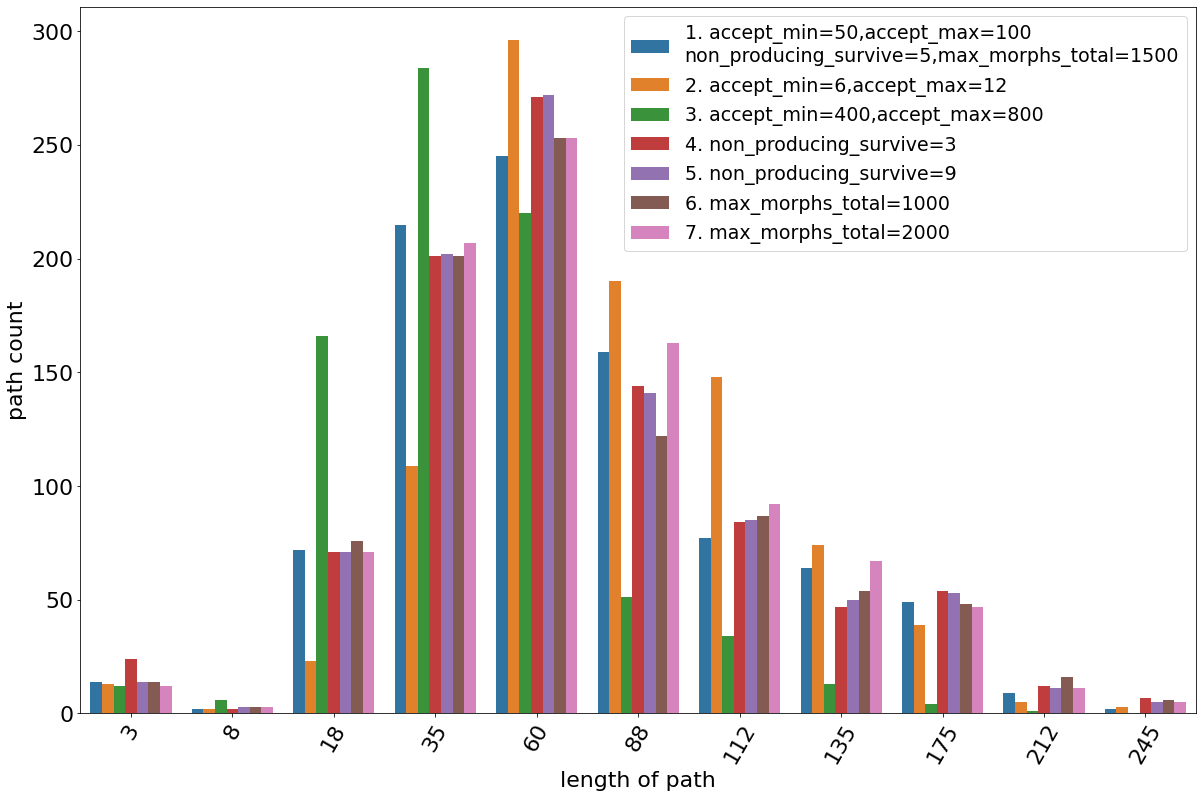

In [28]:
bins=[0,5,10,25,45,75,100,125,150,200,225,247]
labels=[3,8,18,35,60,88,112,135,175,212,245]

plot_without_percent(metriky_default, metriky_acc_6_12, metriky_acc_400_800,metriky_non_prod_3,
                 metriky_non_prod_9, metriky_max_1000,metriky_max_2000, bins,
                 labels, 'delka','1. accept_min=50,accept_max=100\nnon_producing_survive=5,max_morphs_total=1500', 
                 '2. accept_min=6,accept_max=12','3. accept_min=400,accept_max=800',
                 '4. non_producing_survive=3','5. non_producing_survive=9',
                 '6. max_morphs_total=1000','7. max_morphs_total=2000',                 
                 'length','Length','length of path','path count','delka',rotation=60)

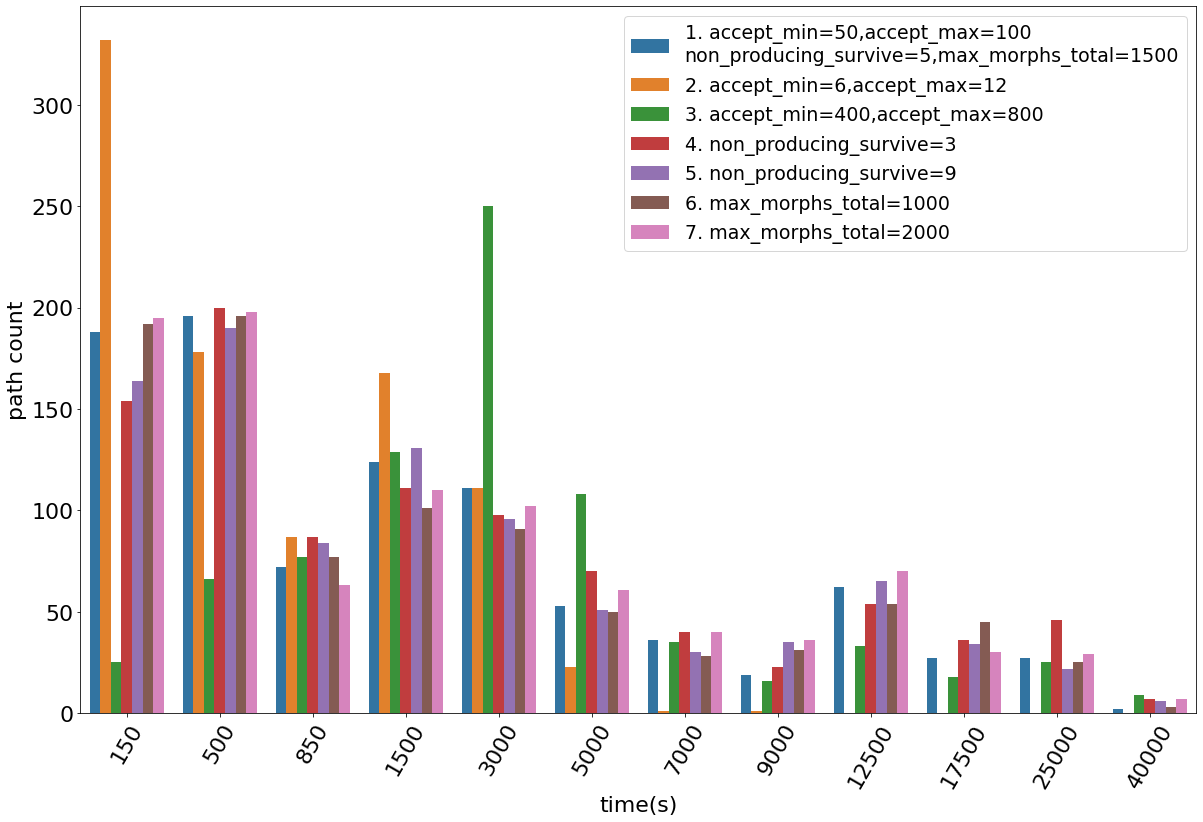

In [29]:
bins=[1,300,700,1000,2000,4000,6000,8000,10000,15000,20000,30000,60000]
labels=[150,500,850,1500,3000,5000,7000,9000,12500,17500,25000,40000]

plot_without_percent(metriky_default, metriky_acc_6_12, metriky_acc_400_800,
                 metriky_non_prod_3,metriky_non_prod_9, 
                 metriky_max_1000, metriky_max_2000, 
                 bins, labels, 'time','1. accept_min=50,accept_max=100\nnon_producing_survive=5,max_morphs_total=1500', 
                 '2. accept_min=6,accept_max=12','3. accept_min=400,accept_max=800',
                 '4. non_producing_survive=3','5. non_producing_survive=9',
                 '6. max_morphs_total=1000','7. max_morphs_total=2000', 'time','Time','time(s)','path count', 'time',rotation=60)

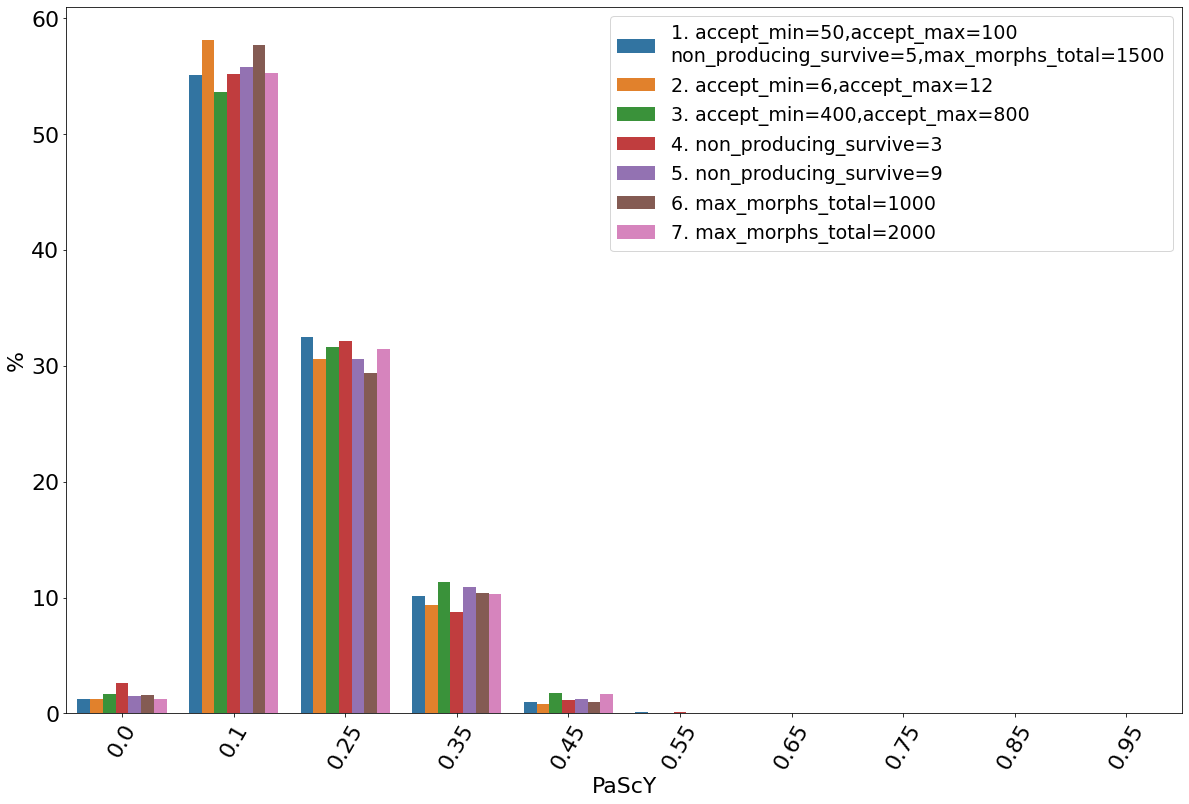

In [30]:
binss = [-0.5,0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
labels=[0,0.1,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]


plot_with_percent(metriky_default, metriky_acc_6_12, metriky_acc_400_800,
                metriky_non_prod_3,metriky_non_prod_9, 
                metriky_max_1000,metriky_max_2000,
                binss, labels, 'PaScY','1. accept_min=50,accept_max=100\nnon_producing_survive=5,max_morphs_total=1500',
                '2. accept_min=6,accept_max=12',
                '3. accept_min=400,accept_max=800','4. non_producing_survive=3','5. non_producing_survive=9',
                '6. max_morphs_total=1000','7. max_morphs_total=2000',
                'PaScY','Pascy','PaScY',font_size_anotace=12)

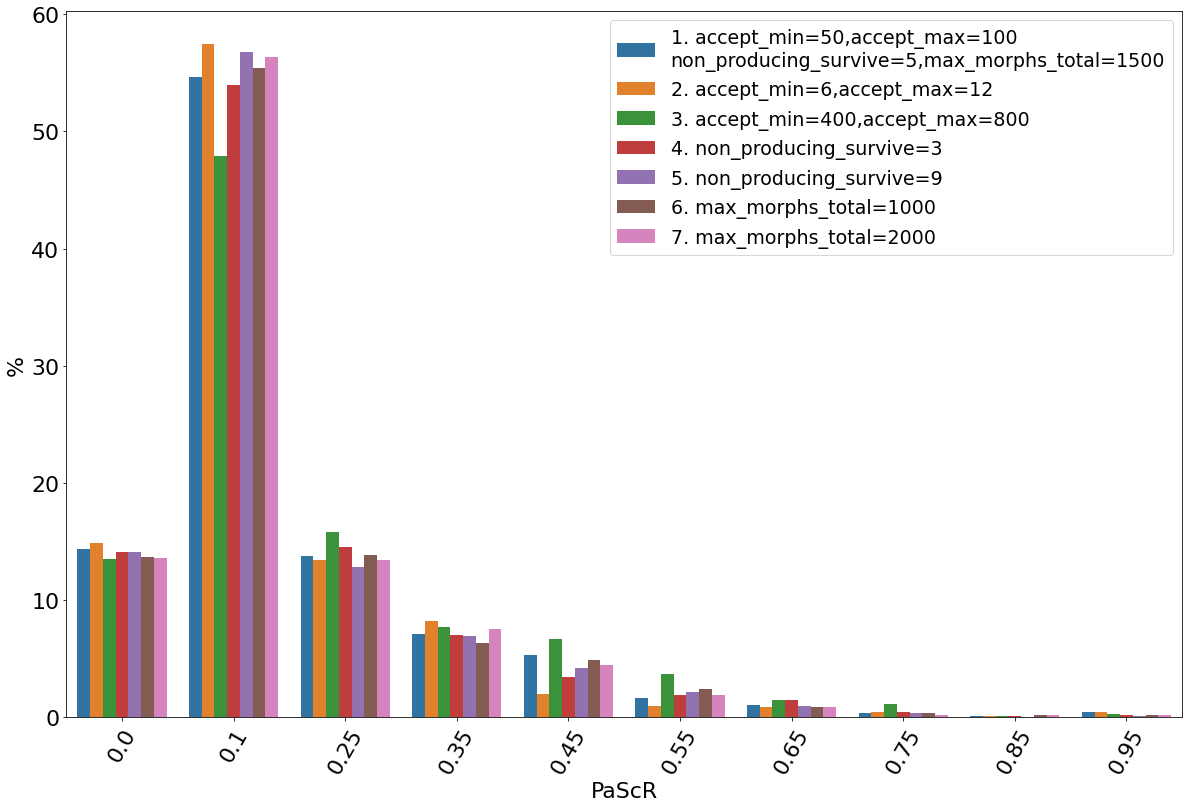

In [31]:
binss = [-0.5,0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
labels=[0,0.1,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]


plot_with_percent(metriky_default, metriky_acc_6_12, metriky_acc_400_800,
                metriky_non_prod_3,metriky_non_prod_9, metriky_max_1000,metriky_max_2000,
                binss, labels, 'PaScR','1. accept_min=50,accept_max=100\nnon_producing_survive=5,max_morphs_total=1500',
                '2. accept_min=6,accept_max=12',
                '3. accept_min=400,accept_max=800','4. non_producing_survive=3','5. non_producing_survive=9',
                '6. max_morphs_total=1000','7. max_morphs_total=2000',
                'PaScR','Pascr','PaScR',font_size_anotace=12)

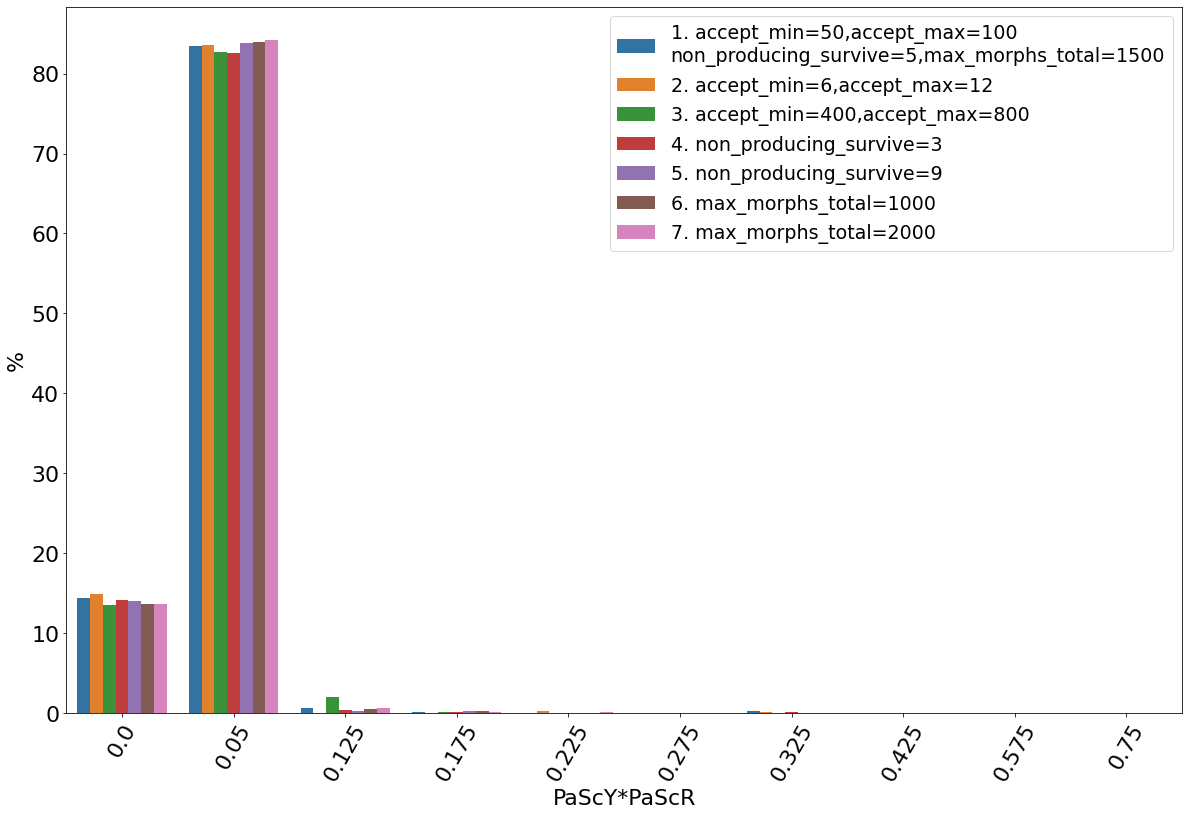

In [32]:
binss = [-0.5,0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
labels=[0,0.05,0.125,0.175,0.225,0.275,0.325,0.75,0.425,0.575]


plot_with_percent(metriky_default, metriky_acc_6_12, metriky_acc_400_800,
                metriky_non_prod_3,metriky_non_prod_9, metriky_max_1000,metriky_max_2000,
                binss, labels, 'PaScY*PaScR','1. accept_min=50,accept_max=100\nnon_producing_survive=5,max_morphs_total=1500',
                '2. accept_min=6,accept_max=12',
                '3. accept_min=400,accept_max=800', '4. non_producing_survive=3','5. non_producing_survive=9',
                '6. max_morphs_total=1000','7. max_morphs_total=2000',
                'PaScY*PaScR','Pascy*Pascr','PaScY*PaScR',font_size_anotace=12)

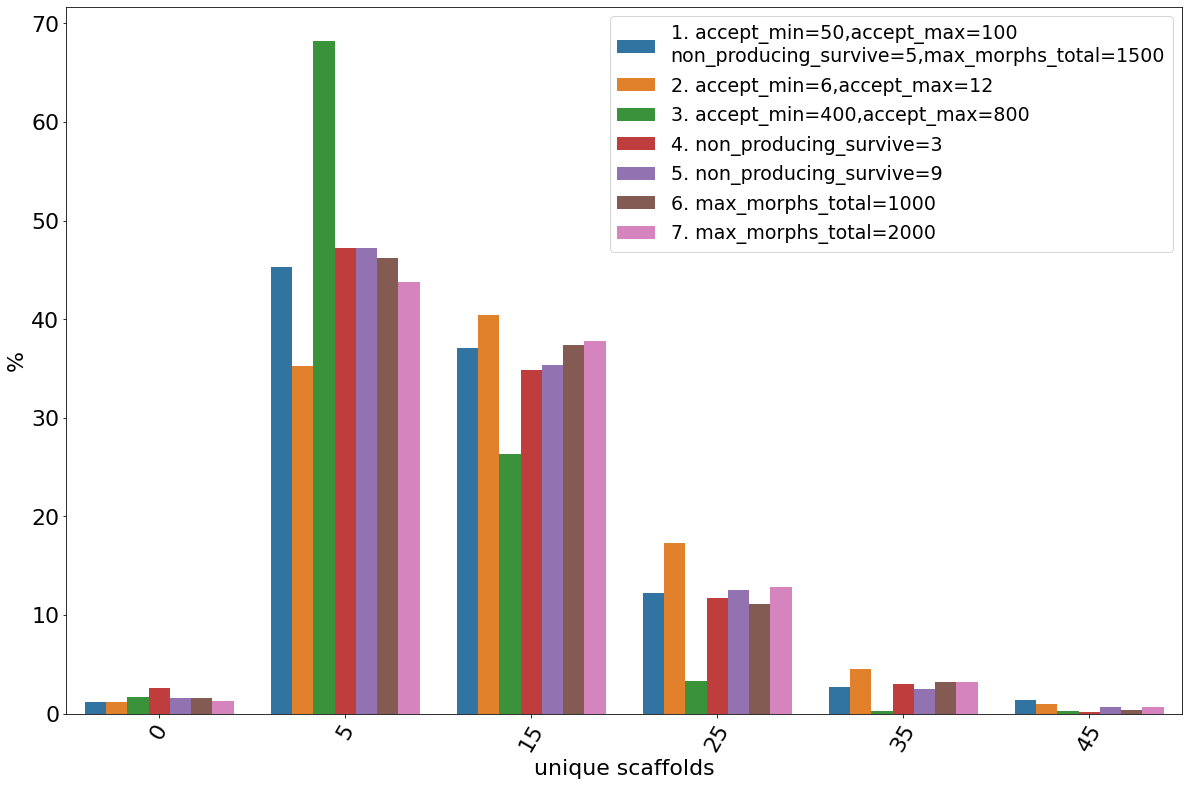

In [33]:
binss = [-0.5,0,10,20,30,40,50]
labels=[0,5,15,25,35,45]


plot_with_percent(metriky_default, metriky_acc_6_12, metriky_acc_400_800,
                metriky_non_prod_3,metriky_non_prod_9, 
                metriky_max_1000,metriky_max_2000,
                binss, labels, 'new_scaffold','1. accept_min=50,accept_max=100\nnon_producing_survive=5,max_morphs_total=1500',
                '2. accept_min=6,accept_max=12',
                '3. accept_min=400,accept_max=800', '4. non_producing_survive=3','5. non_producing_survive=9',
                '6. max_morphs_total=1000','7. max_morphs_total=2000',
                'new_scaffold_uniq','New_Scaffold_Uniq','unique scaffolds',font_size_anotace=13)

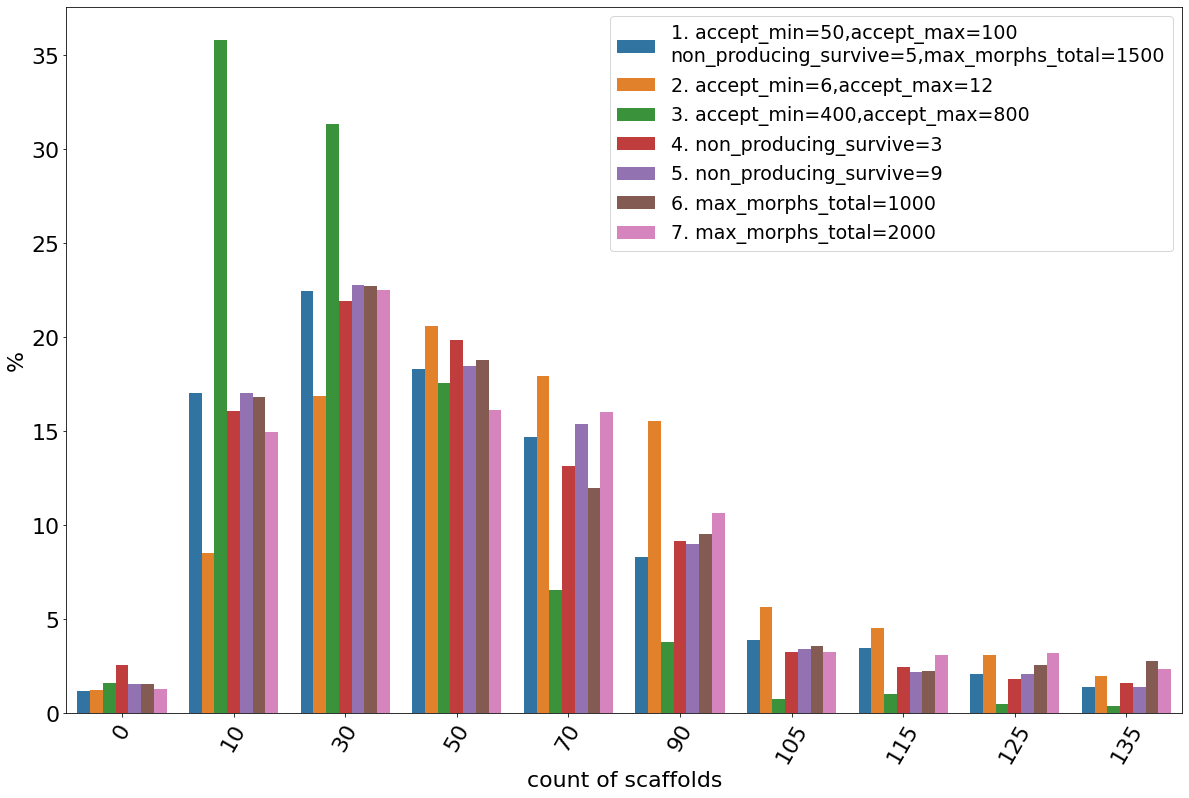

In [34]:
binss = [-0.5,0,20,40,60,80,100,110,120,130,140]
labels=[0,10,30,50,70,90,105,115,125,135,]


plot_with_percent(metriky_default, metriky_acc_6_12, metriky_acc_400_800,
                metriky_non_prod_3,metriky_non_prod_9, 
                metriky_max_1000,metriky_max_2000,
                binss, labels, 'new_scaffold_count','1. accept_min=50,accept_max=100\nnon_producing_survive=5,max_morphs_total=1500'
                ,'2. accept_min=6,accept_max=12',
                '3. accept_min=400,accept_max=800', '4. non_producing_survive=3','5. non_producing_survive=9',
                '6. max_morphs_total=1000','7. max_morphs_total=2000',
                'new_scaffold_count','New_Scaffold_Count','count of scaffolds',font_size_anotace=9)

# Claculate TPRA and TPRAR

For this step we will need VDRML_chembl_inputs.csv and output sets already converted to scaffolds

In [11]:
inputt = pd.read_csv("data/VDRML_chembl_inputs.csv")
inputt.head()

,smiles,chembl_id
0,CCC(CC)(c1ccc(OC[C@H](O)C(C)(C)C)c(C)c1)c2ccc(...,CHEMBL1834893
1,CCOC(=O)\C=C\C1(CC1)[C@H](O)\C=C\[C@@H](C)[C@H...,CHEMBL2112315
2,CC\C(=C/C=C/C(O)(C(F)(F)F)C(F)(F)F)\c1cccc(CCc...,CHEMBL2171447
3,CC\C(=C/C=C/C(O)(C(F)(F)F)C(F)(F)F)\c1cccc(OCc...,CHEMBL2171448
4,CCCc1cc(ccc1c2cc(OCc3ccc(CO)c(CO)c3)ccc2CC)C(O...,CHEMBL2171449


Convert input smiles to svaffolds

In [12]:
inputt['smiles'] = inputt['smiles'].apply(lambda x: MurckoScaffoldSmiles(Chem.MolToSmiles(MakeScaffoldGeneric(Chem.MolFromSmiles(x)))))

To calculate the TPRA, we need to remove duplicates

In [13]:
inputt_1 = inputt['smiles']
inputt_1 = pd.DataFrame(inputt['smiles'].drop_duplicates())
len(inputt_1)

30

In [14]:
def count_metriky_(df, inputt, text, text1):
    uniq_strat_smiles = df.start_smiles.unique()    
    metrika = pd.DataFrame()
    uniq_ = df.start_id.unique()
    
    inputt['pocet'] = [0 for x in range(len(inputt))]

    df1 = df.copy()
    for x in df.id_pair.unique():
        df = df1[df1.id_pair==x]     
        
        one_hot_encoding=pd.get_dummies(df,columns=['morph_smiles'], prefix='')
        one_hot_encoding = one_hot_encoding.rename(columns=lambda x: x.replace("_",""))
        
        neaktiv = pd.DataFrame()
        aktiv = pd.DataFrame()
        neaktiv, aktiv = move_columns_aktiv_in_the_start(uniq_strat_smiles,one_hot_encoding,one_hot_encoding[['idpair','iterace','startid','stopid','startsmiles','stopsmiles','tanimot','delka','time']])
        aktiv = aktiv.groupby(['idpair','startid','stopid','startsmiles','stopsmiles'],as_index=False).max()
    
        aktiv=aktiv.drop(labels=['idpair','tanimot','delka','time','iterace','startid','stopid'],axis=1,inplace = False)
        start = aktiv.startsmiles[0]
        stop = aktiv.stopsmiles[0]
        
        if (start in aktiv.columns) & (stop in aktiv.columns):
            aktiv = aktiv.drop(labels=[start,stop],axis=1,inplace = False)
        elif start in aktiv.columns:
            aktiv = aktiv.drop(labels=[start],axis=1,inplace = False)
        elif stop in aktiv.columns:
            aktiv = aktiv.drop(labels=[stop],axis=1,inplace = False)
        else:
            aktiv = aktiv
        
        aktiv=aktiv.drop(labels=['startsmiles','stopsmiles'],axis=1,inplace = False)            
        
        for x in aktiv.columns:
            
            for y in inputt[inputt.smiles==x].index:
                    inputt.pocet.loc[y] +=1
               
    a = len(inputt[inputt.pocet!=0])
    print(f"For {text} the {text1}  is {a}/{len(inputt)} , in percentage is {a/len(inputt)}")
    

In [15]:
count_metriky_(df_default,inputt_1, "default", "TPRA")
count_metriky_(df_default,inputt, "default", "TPRAR")

/home/valeriia/anaconda3/envs/rdkit-env/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


For default the TPRA  is 23/30 , in percentage is 0.7666666666666667
For default the TPRAR  is 33/47 , in percentage is 0.7021276595744681


In [16]:
count_metriky_(df_accept_6_12,inputt_1, "accept_min=6, accept_max = 12", "TPRA")
count_metriky_(df_accept_6_12,inputt, "accept_min=6, accept_max = 12", "TPRAR")

For accept_min=6, accept_max = 12 the TPRA  is 24/30 , in percentage is 0.8
For accept_min=6, accept_max = 12 the TPRAR  is 34/47 , in percentage is 0.723404255319149


In [17]:
count_metriky_(df_accept_400_800,inputt_1, "accept_min=400, accept_max = 800", "TPRA")
count_metriky_(df_accept_400_800,inputt, "accept_min=400, accept_max = 800", "TPRAR")

For accept_min=400, accept_max = 800 the TPRA  is 21/30 , in percentage is 0.7
For accept_min=400, accept_max = 800 the TPRAR  is 28/47 , in percentage is 0.5957446808510638


In [18]:
count_metriky_(df_non_prod_9,inputt_1, "non_producing_survive=9", "TPRA")
count_metriky_(df_non_prod_9,inputt, "non_producing_survive=9", "TPRAR")

For non_producing_survive=9 the TPRA  is 22/30 , in percentage is 0.7333333333333333
For non_producing_survive=9 the TPRAR  is 29/47 , in percentage is 0.6170212765957447


In [19]:
count_metriky_(df_non_prod_3,inputt_1, "non_producing_survive=3", "TPRA")
count_metriky_(df_non_prod_3,inputt, "non_producing_survive=3", "TPRAR")

For non_producing_survive=3 the TPRA  is 23/30 , in percentage is 0.7666666666666667
For non_producing_survive=3 the TPRAR  is 30/47 , in percentage is 0.6382978723404256


In [20]:
count_metriky_(df_max_1000,inputt_1, "max_morphs_total=1000", "TPRA")
count_metriky_(df_max_1000,inputt, "max_morphs_total=1000", "TPRAR")

For max_morphs_total=1000 the TPRA  is 22/30 , in percentage is 0.7333333333333333
For max_morphs_total=1000 the TPRAR  is 29/47 , in percentage is 0.6170212765957447


In [21]:
count_metriky_(df_max_2000,inputt_1, "max_morphs_total=2000", "TPRA")
count_metriky_(df_max_2000,inputt, "max_morphs_total=2000", "TPRAR")

For max_morphs_total=2000 the TPRA  is 21/30 , in percentage is 0.7
For max_morphs_total=2000 the TPRAR  is 30/47 , in percentage is 0.6382978723404256


## Mean time

In [23]:
print("default:", df_default.time.mean())
print("acc_6_12:", df_accept_6_12.time.mean())
print("acc_400_800:", df_accept_400_800.time.mean())
print("non_prod_3:", df_non_prod_3.time.mean())
print("non_prod_9:", df_non_prod_9.time.mean())
print("max_1000:", df_max_1000.time.mean())
print("max_2000:", df_max_2000.time.mean())

default: 7124.020290526064
acc_6_12: 1068.9605310855839
acc_400_800: 8953.96527328512
non_prod_3: 8937.957478055805
non_prod_9: 7777.622048873034
max_1000: 7121.143728702765
max_2000: 7762.585819403426
